# CS670 Group Project Phase 3
Team members:<br>
Alexander Burke Alexander.Burke001@umb.edu<br>
Divya Bajaj : Divya.Bajaj001@umb.edu<br>
Yu-Ju Chien : Yuju.Chien001@umb.edu<br>
Oleksandr Pimenov: pialgi@live.com<br>

In [47]:
import numpy as np
from sklearn import preprocessing

# Task 1: Split the experimental samples and normalize the samples
data0 = np.load('data_selected_1980_2010.npy').astype(np.float)
data1 = np.load('target_1980_2010.npy').astype(np.float)
# Concatenate data_selected(features) with target
data = np.concatenate((data0, data1), axis = 1)

normalized_x = preprocessing.normalize(data0)
print("Raw data before normalization:")
print(data0)
print("\nData after normalization:")
print(normalized_x)

split = 9497
x_train, x_test, y_train, y_test = data0[:split, :], data0[split:, :], data1[:split, 1:], data1[split:, 1:]
print("\nSize after spliting data into training set and testing set: ")
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

from imblearn.over_sampling import SMOTE 
x_train_balanced, y_train_balanced = SMOTE().fit_sample(x_train, y_train.ravel())
print("\nSize of balanced data: ")
print(x_train_balanced.shape)
print(y_train_balanced.shape)

Raw data before normalization:
[[  12.66      15.85     279.88     290.75   ]
 [  13.5      -13.42     279.48     290.91   ]
 [  11.28       8.75     279.83     291.23   ]
 ..., 
 [   0.70001   -1.88     284.47     288.55   ]
 [   5.12      -2.23     282.5      289.02   ]
 [   7.7        3.42     282.4      289.55   ]]

Data after normalization:
[[ 0.0313305   0.039225    0.69263676  0.71953744]
 [ 0.03342772 -0.03322963  0.69202804  0.72033018]
 [ 0.0279116   0.02165128  0.69242044  0.72062897]
 ..., 
 [ 0.00172756 -0.00463967  0.70204566  0.71211472]
 [ 0.01266729 -0.0055172   0.69892778  0.71505878]
 [ 0.01903354  0.00845386  0.69806118  0.71573518]]

Size after spliting data into training set and testing set: 
((9497L, 4L), (1803L, 4L))
((9497L, 1L), (1803L, 1L))

Size of balanced data: 
(18102L, 4L)
(18102L,)


In [48]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
# print(y_pred)
print "Accuracy: %f" % metrics.accuracy_score(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

# True Negative = 1684  False Positive = 0
# False Negative = 119  True Positive = 0

Accuracy: 0.933999
[[1684    0]
 [ 119    0]]
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.97      1684
        1.0       0.00      0.00      0.00       119

avg / total       0.87      0.93      0.90      1803



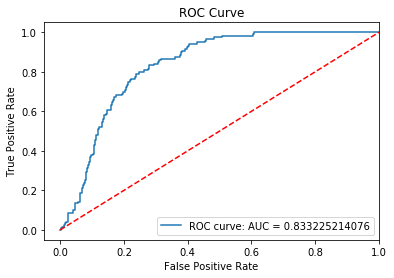

AUC = 0.833225


In [49]:
# ROC Curve with imbalanced data
from sklearn.metrics import roc_auc_score
y_pred_prob = gnb.predict_proba(x_test)[::, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
# print(thresholds)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plot.title('ROC Curve')
plot.plot(fpr, tpr, label = "ROC curve: AUC = " + str(auc))
plot.legend(loc = 'lower right')
plot.plot([0, 1], [0, 1], 'r--')
plot.xlim([-0.05, 1.0])
plot.ylim([-0.05, 1.05])
plot.ylabel('True Positive Rate')
plot.xlabel('False Positive Rate')
plot.show()
print "AUC = %f" % auc

In [50]:
gnb_balanced = GaussianNB()
y_pred = gnb_balanced.fit(x_train_balanced, y_train_balanced).predict(x_test)
# print(y_pred)
print "Accuracy(balanced): %f" % metrics.accuracy_score(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

# True Negative = 1059  False Positive = 625
# False Negative = 10  True Positive = 109
# Although the accuracy of balanced training data (0.647809) is way much lower
# than the accuracy of imbalanced training data (0.933999), the precision of 
# balanced data set (0.94) is higher than the precision of imbalanced data set 
# (0.87)

Accuracy(balanced): 0.646700
[[1056  628]
 [   9  110]]
             precision    recall  f1-score   support

        0.0       0.99      0.63      0.77      1684
        1.0       0.15      0.92      0.26       119

avg / total       0.94      0.65      0.73      1803



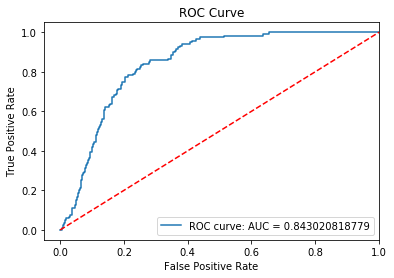

AUC = 0.843021


In [51]:
# ROC Curve with balanced data
y_pred_prob = gnb_balanced.predict_proba(x_test)[::, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
# print(thresholds)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plot.title('ROC Curve')
plot.plot(fpr, tpr, label = "ROC curve: AUC = " + str(auc))
plot.legend(loc = 'lower right')
plot.plot([0, 1], [0, 1], 'r--')
plot.xlim([-0.05, 1.0])
plot.ylim([-0.05, 1.05])
plot.ylabel('True Positive Rate')
plot.xlabel('False Positive Rate')
plot.show()
print "AUC = %f" % auc

# The balanced data's AUC (0.841898) is better than the imbalanced data's AUC (0.833225)

# For the best performance with KNN classifier and best performance with naive 
# bayes classifier, the naive bayes classifier gets higher AUC (0.843021) than
# KNN's AUC (0.729131). Therefore, the naive bayes classifier is better to use in
# this data set and the balanced data set gets better result than the imbalanced
# data set